In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import sklearn.model_selection as ms

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data Source
train_values = pd.read_csv('train_values_OL27nta.csv')
train_values.head(5)

train_labels = pd.read_csv('train_labels_DPetPH2.csv')
train_labels.head(5)

train = train_values.merge(train_labels,on='row_id')
train.head(5)
train.shape

(1562, 46)

In [3]:
test = pd.read_csv('test_values_kWyIOM9.csv')
test.isnull().mean()

row_id                                        0.000000
county_code                                   0.000000
state                                         0.000000
population                                    0.000000
renter_occupied_households                    0.000000
pct_renter_occupied                           0.000000
evictions                                     0.198604
rent_burden                                   0.000000
pct_white                                     0.000000
pct_af_am                                     0.000000
pct_hispanic                                  0.000000
pct_am_ind                                    0.000000
pct_asian                                     0.000000
pct_nh_pi                                     0.000000
pct_multiple                                  0.000000
pct_other                                     0.000000
poverty_rate                                  0.000000
rucc                                          0.000000
urban_infl

In [4]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(train, train.gross_rent, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((1249, 46), (313, 46))

In [5]:
categorical = [var for var in train.columns if train[var].dtype=='O']
print(categorical)

['county_code', 'state', 'rucc', 'urban_influence', 'economic_typology']


In [6]:
for var in categorical:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

county_code 0.0  % missing values
state 0.0  % missing values
rucc 0.0  % missing values
urban_influence 0.0  % missing values
economic_typology 0.0  % missing values


In [7]:
boolean = [var for var in train.columns if train[var].dtype=='?']
print('There are {} boolean variables'.format(len(boolean)))

There are 0 boolean variables


In [8]:
numerical_with_bool = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables. This includes boolean values'.format(len(numerical_with_bool)))

There are 41 numerical variables. This includes boolean values


In [9]:
numerical = [var for var in train[numerical_with_bool] if var not in boolean]
print('There are {} numerical variables'.format(len(numerical)))

There are 41 numerical variables


In [10]:
for var in numerical:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

row_id 0.0  % missing values
population 0.0  % missing values
renter_occupied_households 0.0  % missing values
pct_renter_occupied 0.0  % missing values
evictions 0.207  % missing values
rent_burden 0.0  % missing values
pct_white 0.0  % missing values
pct_af_am 0.0  % missing values
pct_hispanic 0.0  % missing values
pct_am_ind 0.0  % missing values
pct_asian 0.0  % missing values
pct_nh_pi 0.0  % missing values
pct_multiple 0.0  % missing values
pct_other 0.0  % missing values
poverty_rate 0.0  % missing values
pct_civilian_labor 0.0  % missing values
pct_unemployment 0.0  % missing values
pct_uninsured_adults 0.0  % missing values
pct_uninsured_children 0.0  % missing values
pct_adult_obesity 0.0  % missing values
pct_adult_smoking 0.141  % missing values
pct_diabetes 0.0  % missing values
pct_low_birthweight 0.071  % missing values
pct_excessive_drinking 0.307  % missing values
pct_physical_inactivity 0.0  % missing values
air_pollution_particulate_matter_value 0.011  % missing val

In [11]:
for var in numerical:
    if X_train[var].isnull().mean() > 0.6:
        X_train=X_train.drop(var, axis=1)
        X_test=X_test.drop(var, axis=1)
        

In [12]:
X_train.shape, X_test.shape

((1249, 45), (313, 45))

In [13]:
vars_num_removed =[var for var in train.columns if train[var].isnull().mean()> 0.6 and train[var].dtypes!='O']
print(vars_num_removed)

['homicides_per_100k']


In [14]:
numerical = [var for var in train[numerical] if var not in vars_num_removed]
print('There are {} numerical variables'.format(len(numerical)))

There are 40 numerical variables


In [15]:
# print variables with missing data
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, np.round(X_train[col].isnull().mean(), 3),  ' % missing values')
    

evictions 0.207  % missing values
pct_adult_smoking 0.141  % missing values
pct_low_birthweight 0.071  % missing values
pct_excessive_drinking 0.307  % missing values
air_pollution_particulate_matter_value 0.011  % missing values
motor_vehicle_crash_deaths_per_100k 0.11  % missing values
pop_per_dentist 0.066  % missing values
pop_per_primary_care_physician 0.068  % missing values


In [16]:
# let's identify any discrete variables, if any
discrete = []
for var in numerical:
    if len(train[var].unique())<20:
        print(var, ' values: ', train[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

There are 0 discrete variables


In [17]:
# replace the missing values
for var in numerical:
    
    # calculate the mode
    mode_val = X_train[var].mode()[0]
    
    # train
    
    X_train[var].fillna(mode_val, inplace=True)
    
    # test
    
    X_test[var].fillna(mode_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[numerical].isnull().sum()

row_id                                        0
population                                    0
renter_occupied_households                    0
pct_renter_occupied                           0
evictions                                     0
rent_burden                                   0
pct_white                                     0
pct_af_am                                     0
pct_hispanic                                  0
pct_am_ind                                    0
pct_asian                                     0
pct_nh_pi                                     0
pct_multiple                                  0
pct_other                                     0
poverty_rate                                  0
pct_civilian_labor                            0
pct_unemployment                              0
pct_uninsured_adults                          0
pct_uninsured_children                        0
pct_adult_obesity                             0
pct_adult_smoking                       

In [18]:
X_test[numerical].isnull().sum()

row_id                                        0
population                                    0
renter_occupied_households                    0
pct_renter_occupied                           0
evictions                                     0
rent_burden                                   0
pct_white                                     0
pct_af_am                                     0
pct_hispanic                                  0
pct_am_ind                                    0
pct_asian                                     0
pct_nh_pi                                     0
pct_multiple                                  0
pct_other                                     0
poverty_rate                                  0
pct_civilian_labor                            0
pct_unemployment                              0
pct_uninsured_adults                          0
pct_uninsured_children                        0
pct_adult_obesity                             0
pct_adult_smoking                       

In [19]:
continuous = [var for var in numerical if var not in discrete and var not in ['row_id', 'gross_rent']]
print(continuous)

['population', 'renter_occupied_households', 'pct_renter_occupied', 'evictions', 'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate', 'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes', 'pct_low_birthweight', 'pct_excessive_drinking', 'pct_physical_inactivity', 'air_pollution_particulate_matter_value', 'motor_vehicle_crash_deaths_per_100k', 'heart_disease_mortality_per_100k', 'pop_per_dentist', 'pop_per_primary_care_physician', 'pct_female', 'pct_below_18_years_of_age', 'pct_aged_65_years_and_older', 'pct_adults_less_than_a_high_school_diploma', 'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher', 'birth_rate_per_1k', 'death_rate_per_1k']


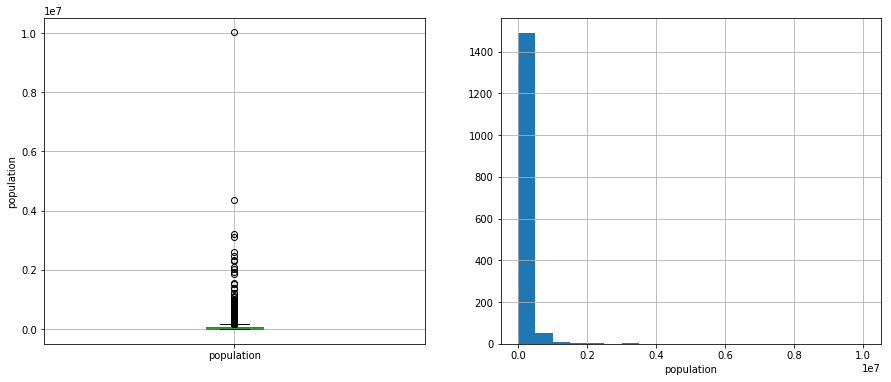

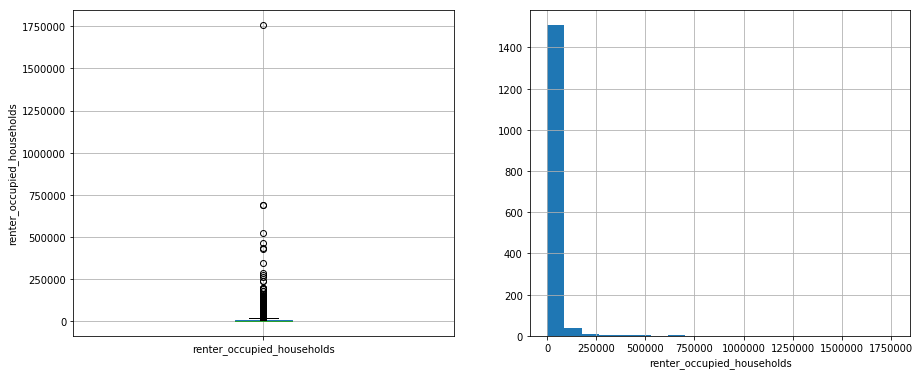

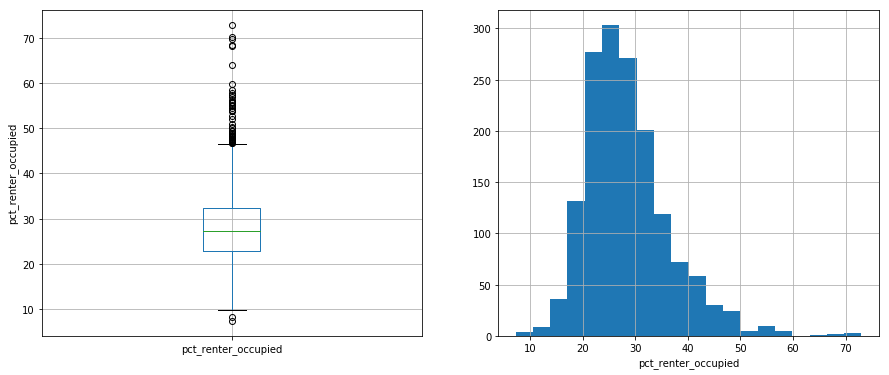

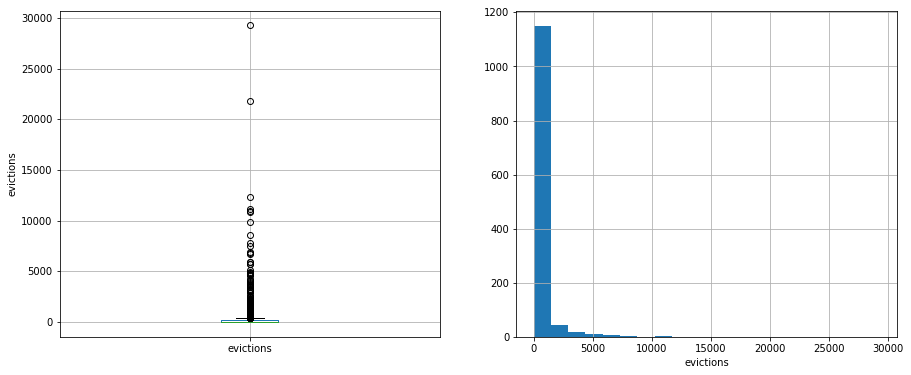

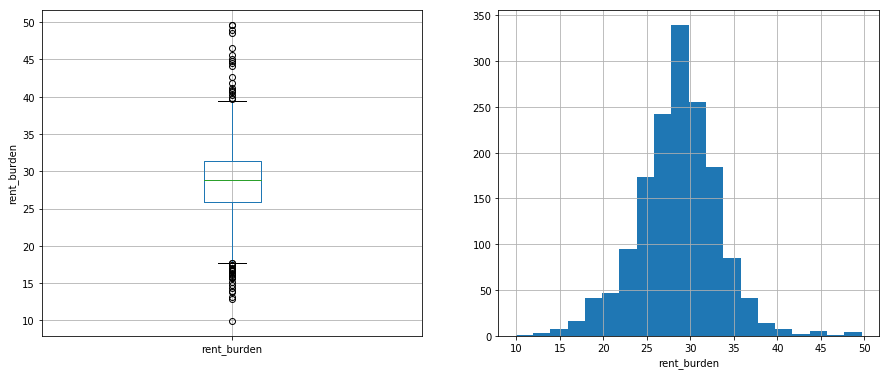

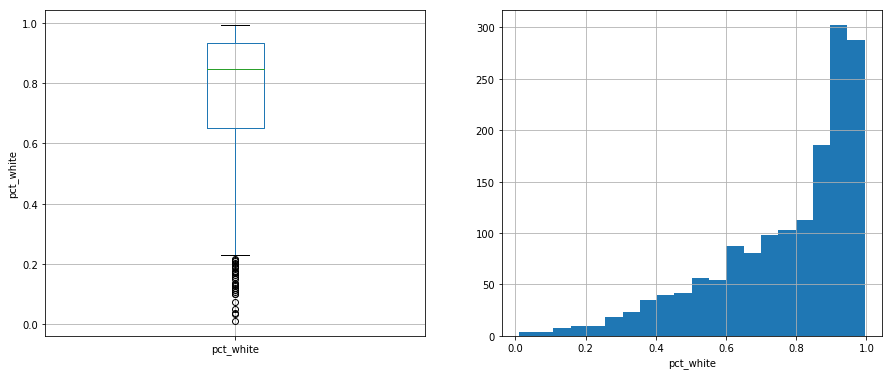

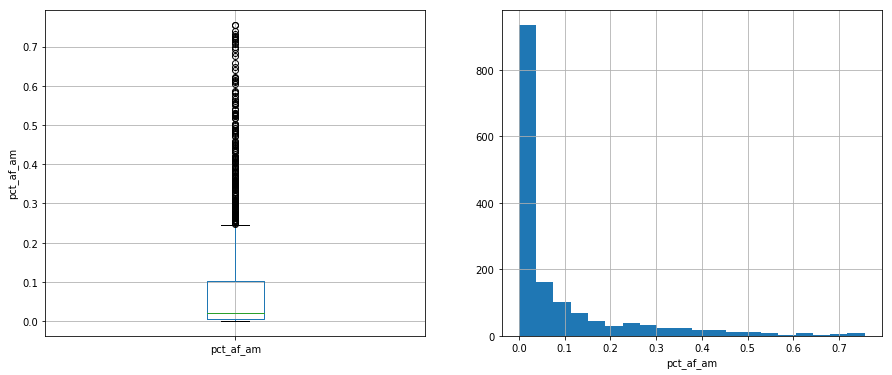

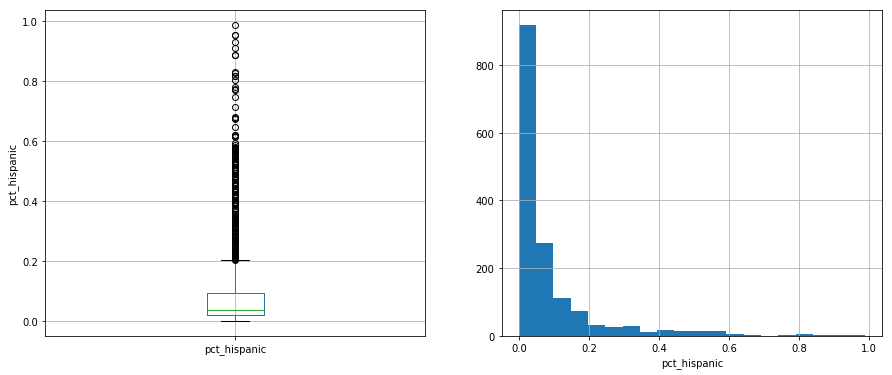

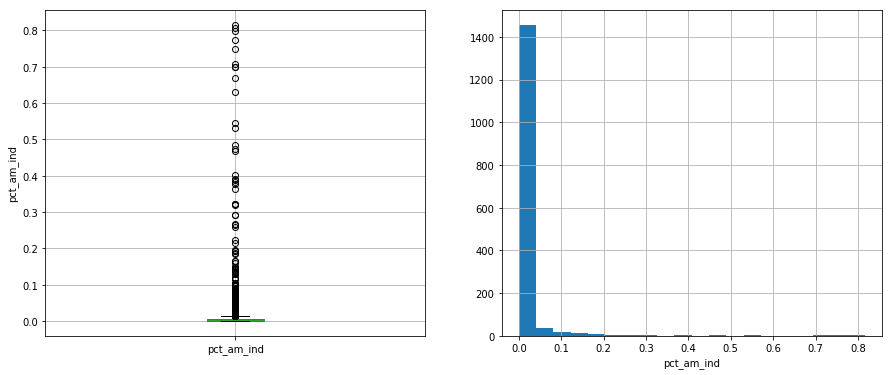

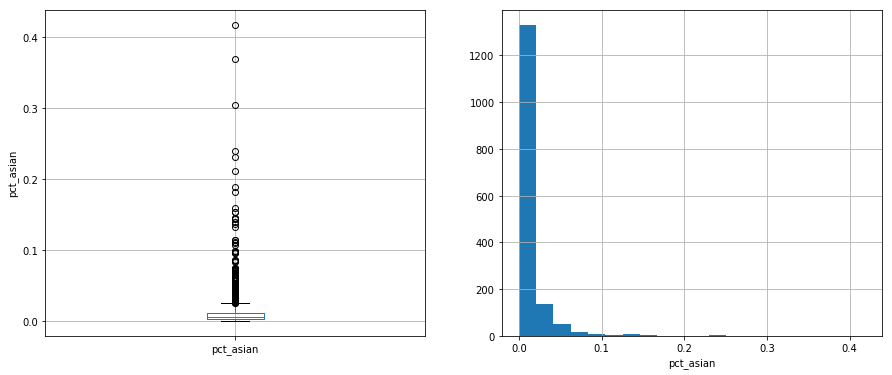

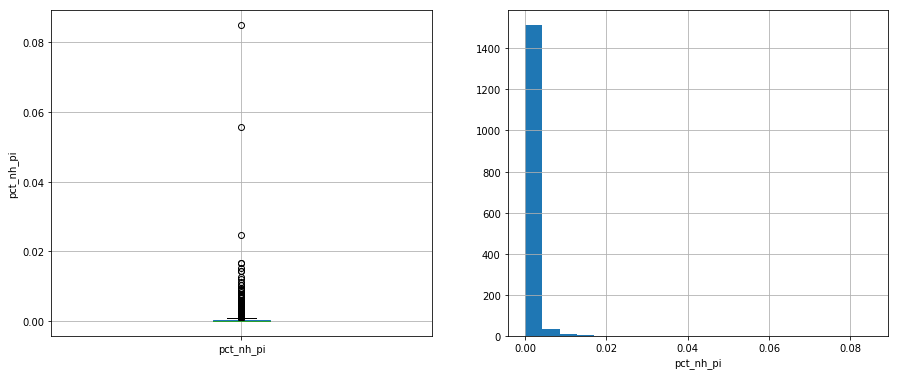

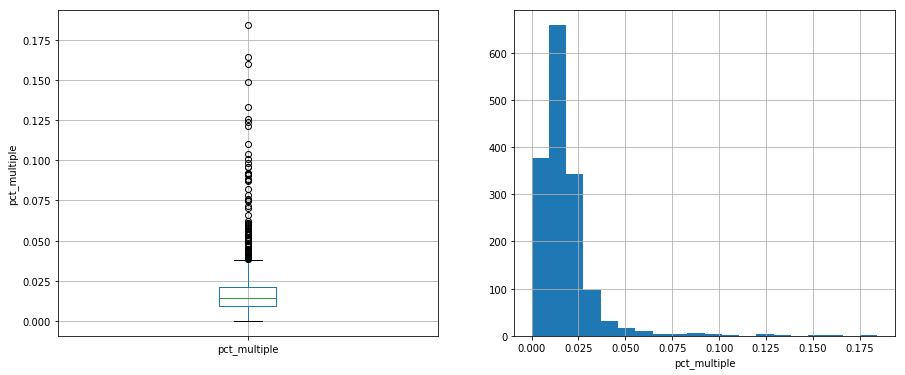

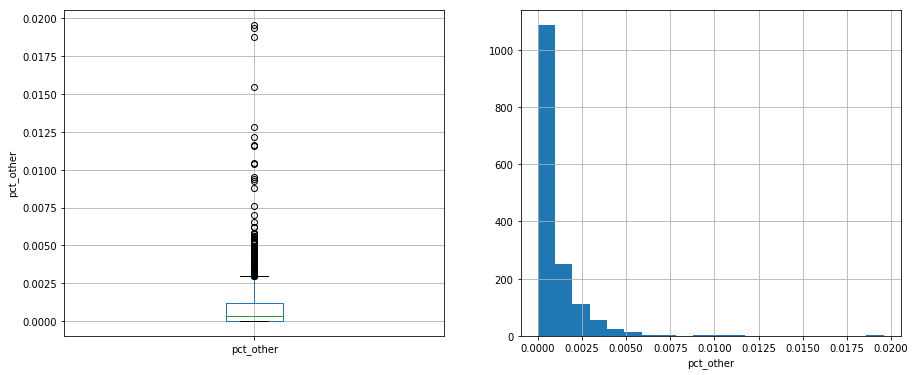

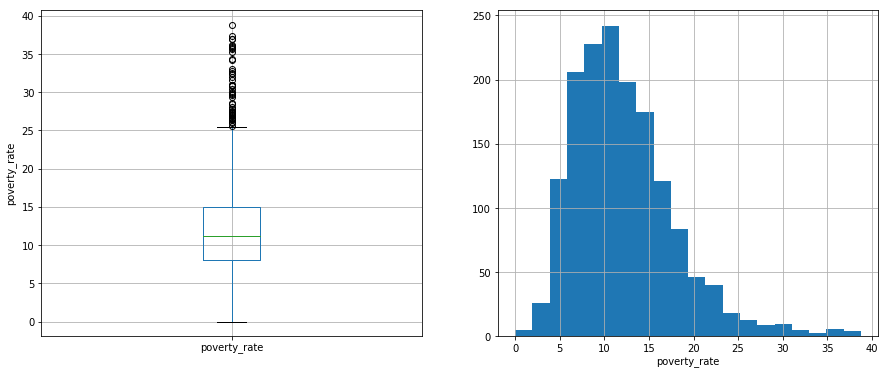

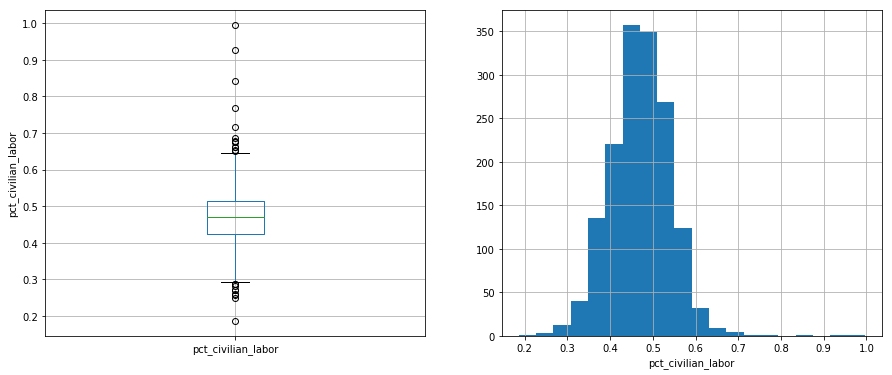

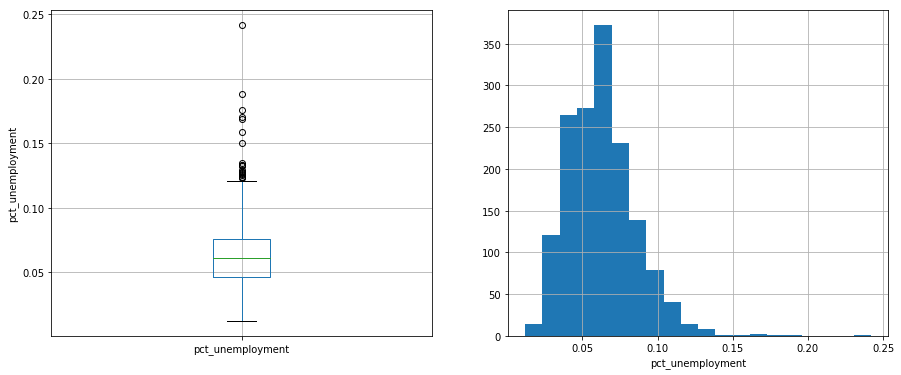

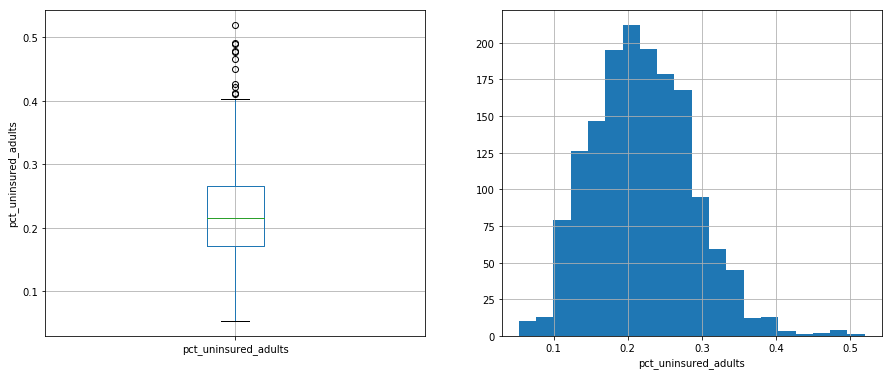

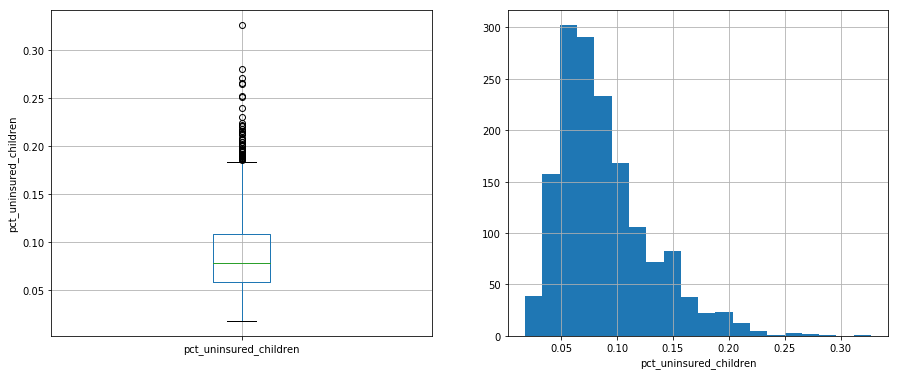

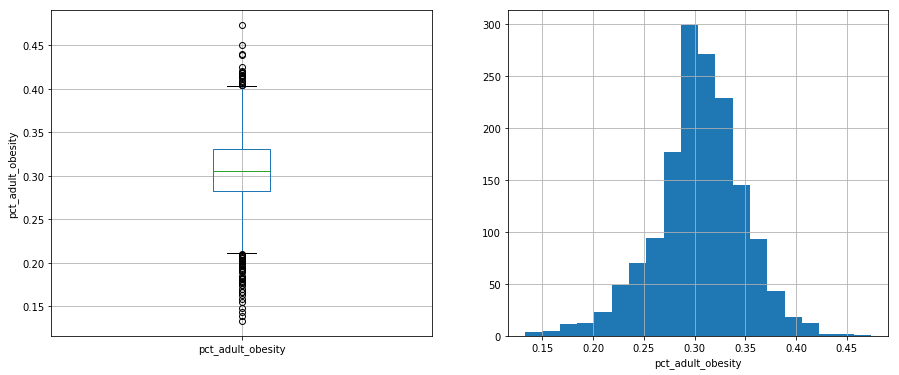

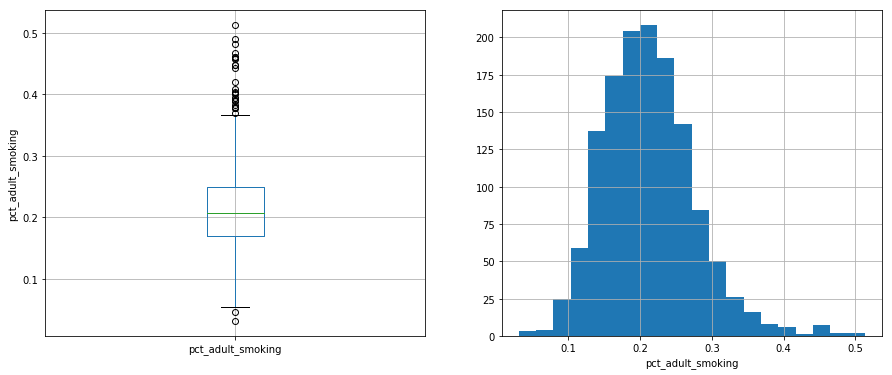

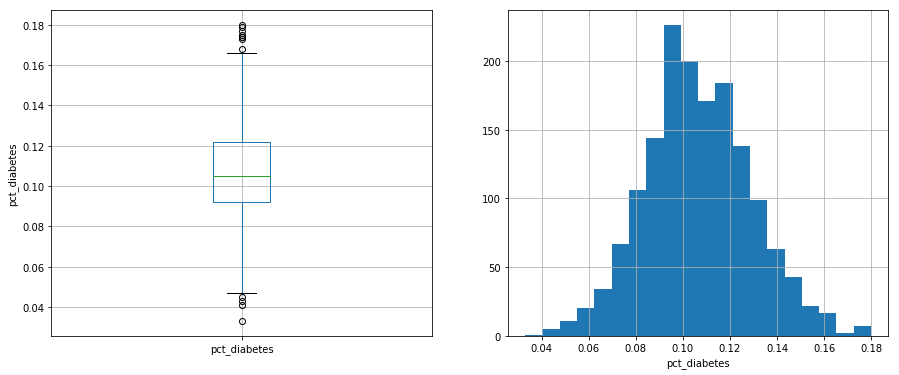

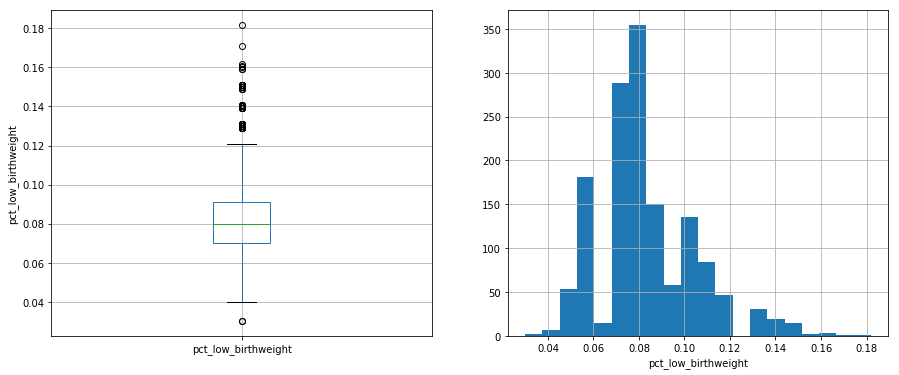

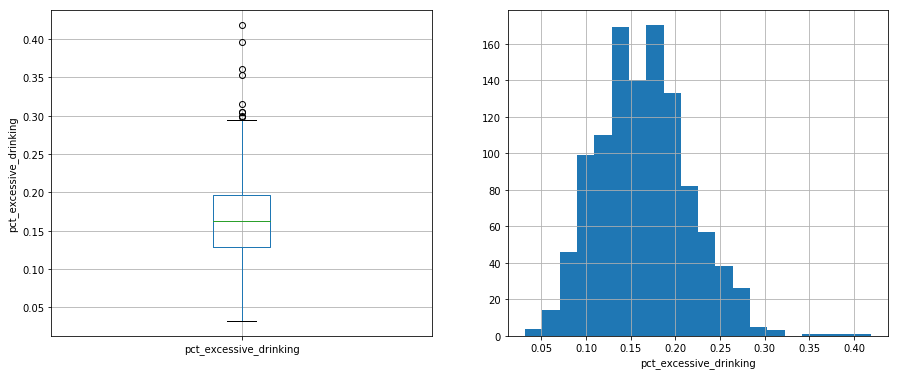

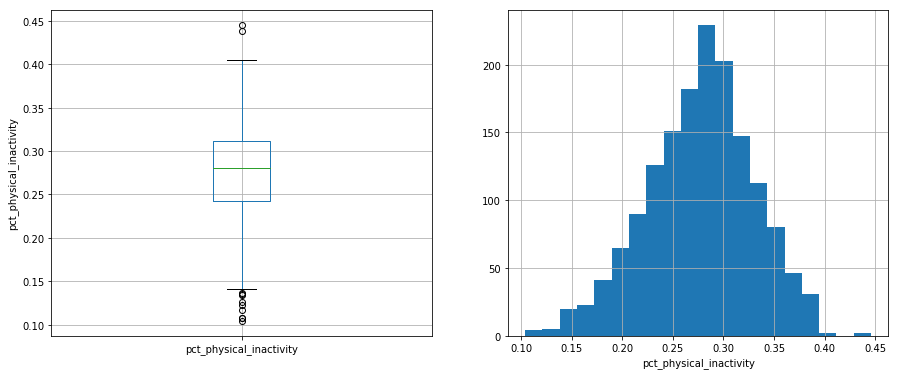

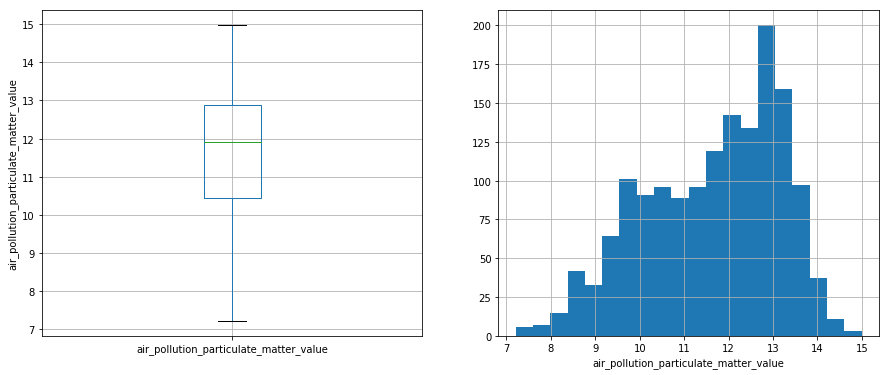

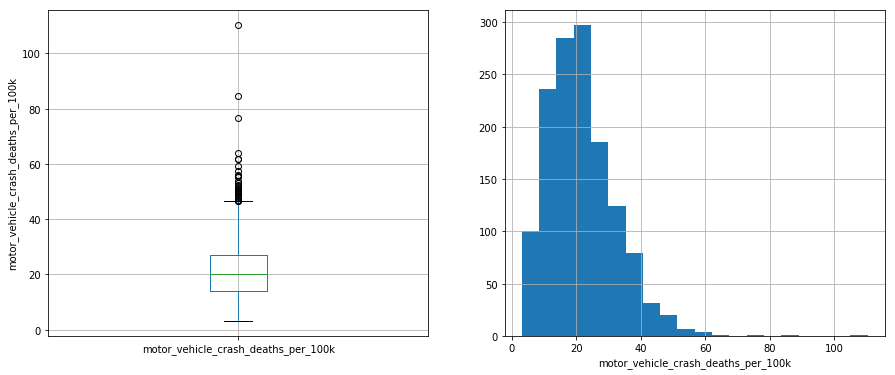

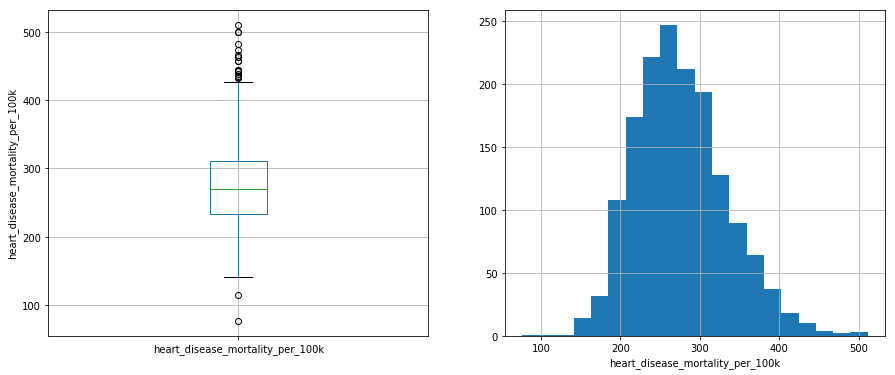

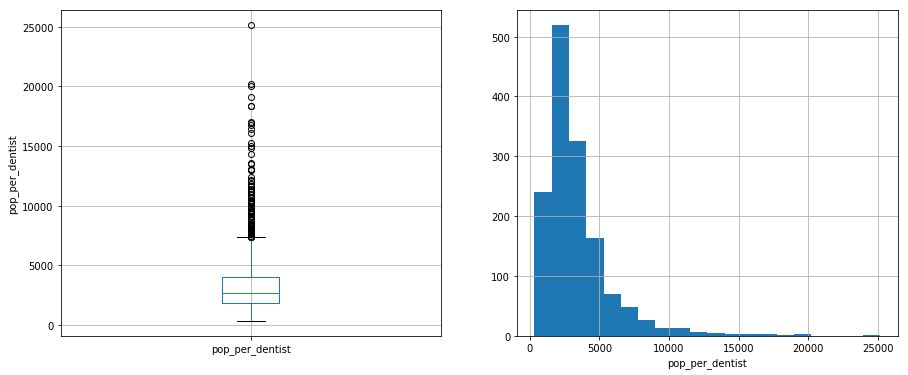

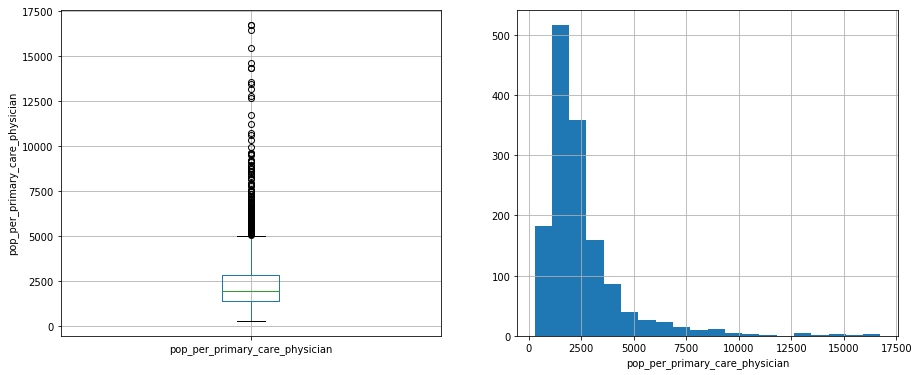

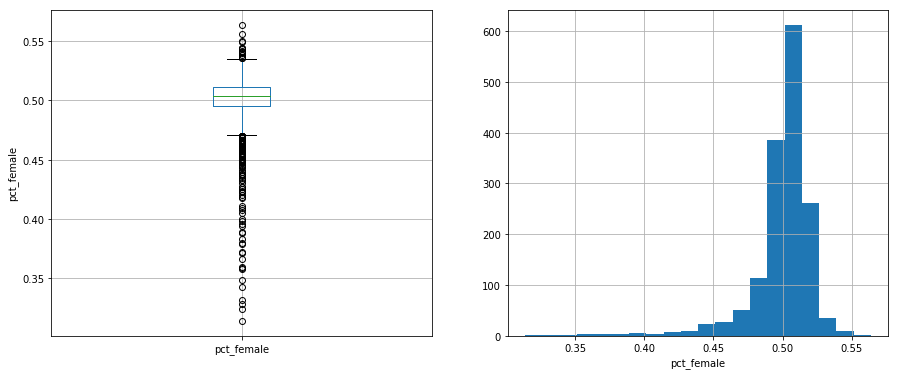

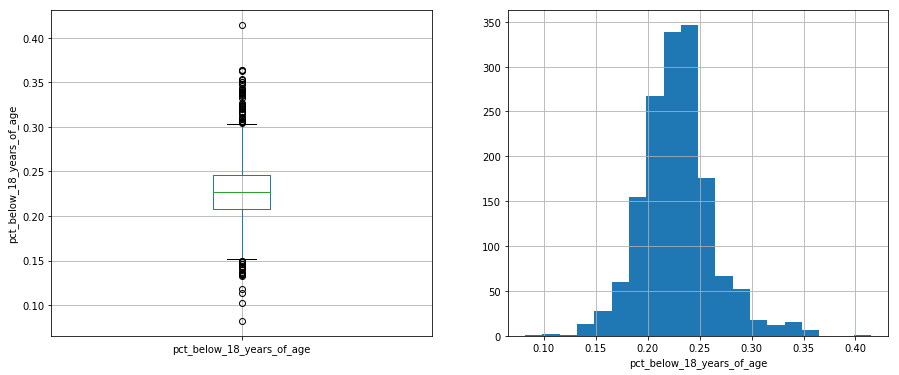

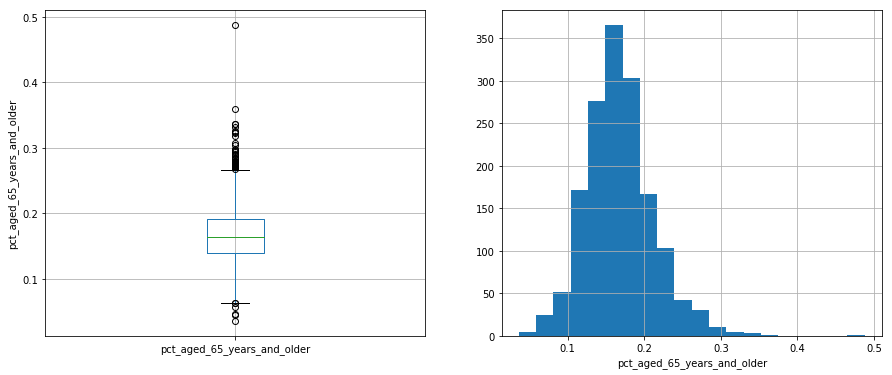

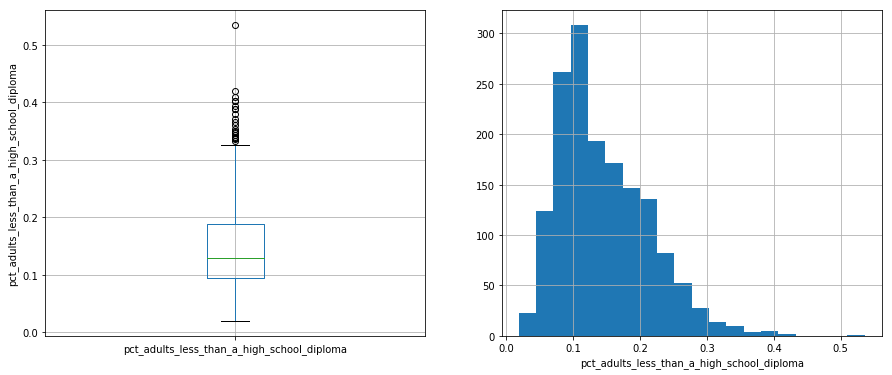

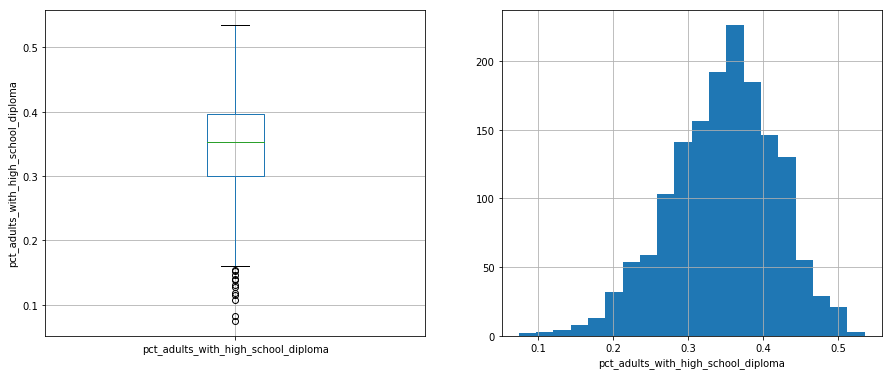

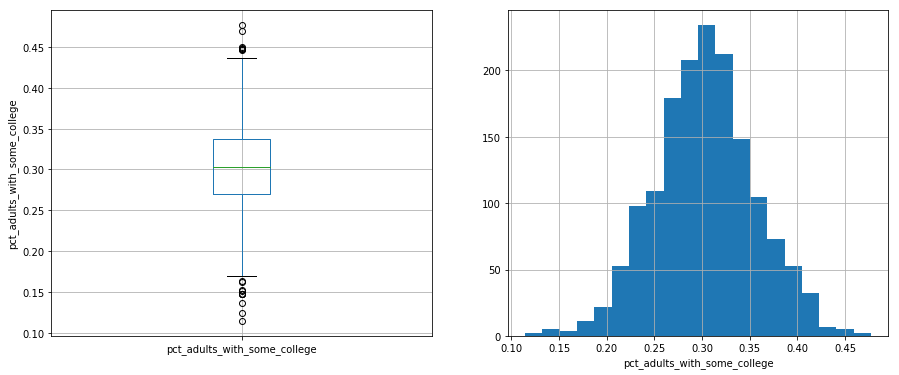

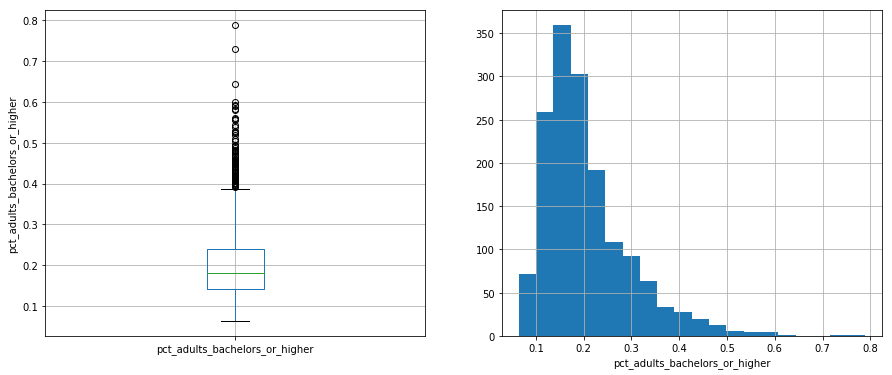

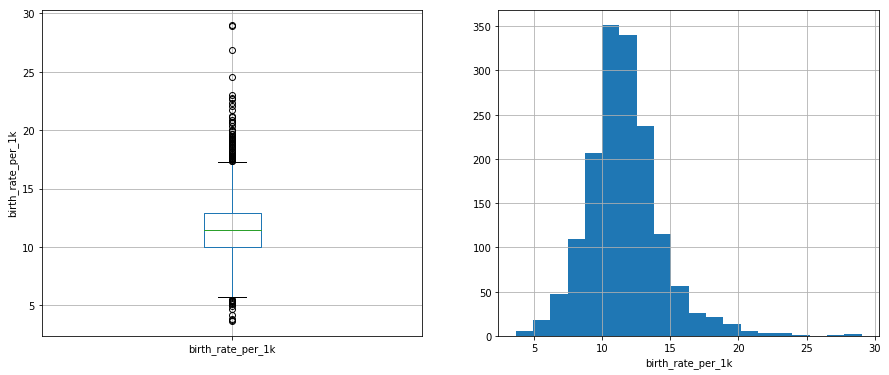

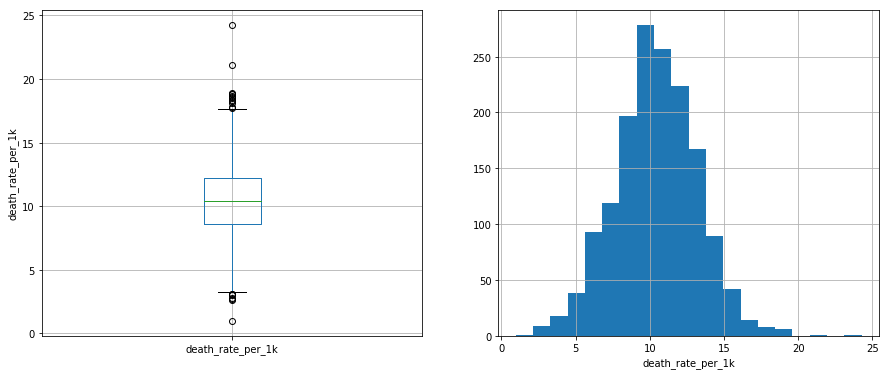

In [20]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = train.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = train[var].hist(bins=20)
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [21]:
len(train.pct_other.unique())

944

In [22]:
for var in continuous:
    if len(train[var].unique()) < 50:
        X_train[var]=np.round(X_train[var], 0)     
        X_test[var]=np.round(X_test[var], 0)

In [23]:
continuous = [var for var in train[continuous] if var not in discrete]
print('There are {} numerical variables'.format(len(continuous)))
continuous

There are 38 numerical variables


['population',
 'renter_occupied_households',
 'pct_renter_occupied',
 'evictions',
 'rent_burden',
 'pct_white',
 'pct_af_am',
 'pct_hispanic',
 'pct_am_ind',
 'pct_asian',
 'pct_nh_pi',
 'pct_multiple',
 'pct_other',
 'poverty_rate',
 'pct_civilian_labor',
 'pct_unemployment',
 'pct_uninsured_adults',
 'pct_uninsured_children',
 'pct_adult_obesity',
 'pct_adult_smoking',
 'pct_diabetes',
 'pct_low_birthweight',
 'pct_excessive_drinking',
 'pct_physical_inactivity',
 'air_pollution_particulate_matter_value',
 'motor_vehicle_crash_deaths_per_100k',
 'heart_disease_mortality_per_100k',
 'pop_per_dentist',
 'pop_per_primary_care_physician',
 'pct_female',
 'pct_below_18_years_of_age',
 'pct_aged_65_years_and_older',
 'pct_adults_less_than_a_high_school_diploma',
 'pct_adults_with_high_school_diploma',
 'pct_adults_with_some_college',
 'pct_adults_bachelors_or_higher',
 'birth_rate_per_1k',
 'death_rate_per_1k']

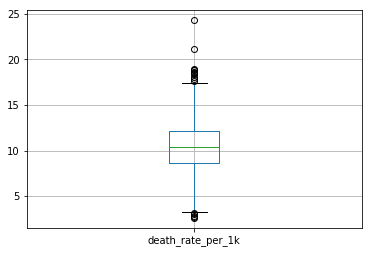

In [24]:
X_train.boxplot(column= 'death_rate_per_1k')

In [25]:
train.death_rate_per_1k.describe()

count    1562.000000
mean       10.415138
std         2.772070
min         0.961076
25%         8.613691
50%        10.396898
75%        12.250655
max        24.281150
Name: death_rate_per_1k, dtype: float64

In [26]:
for var in continuous:
    X_train[var] = np.log(X_train[var])
    X_test[var]= np.log(X_test[var])

In [27]:
for var in categorical:
    print(var, 'contains', len(train[var].unique()), 'labels')

county_code contains 1562 labels
state contains 50 labels
rucc contains 9 labels
urban_influence contains 12 labels
economic_typology contains 6 labels


In [28]:
from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()

for df in [X_train, X_test]:
    for var in boolean:
        df[var] = lb_enc.fit_transform(df[var])

In [29]:
X_train.head()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
302,302,7e569d5,528ea9f,9.784929,7.631917,3.276994,3.218876,3.347023,-0.059080,-5.881043,-3.348884,-6.577781,-6.802725,-4.652640,-5.018501,-7.130229,2.984469,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Manufacturing-dependent,-0.991553,-2.273026,-1.431292,-2.551046,-1.130103,-1.177655,-2.032558,-inf,-2.551046,-0.957113,2.586569,3.242202,5.799093,7.986165,7.377759,-0.667479,-1.518684,-1.703749,-1.379353,-0.999240,-1.359783,-2.092461,2.365502,2.561835,508
829,829,28622ff,9e0007d,12.877567,11.135012,3.681956,-inf,3.411016,-0.609055,-1.041462,-2.834209,-5.996134,-3.882291,-8.116397,-3.934856,-6.506959,2.516648,"Metro - Counties in metro areas of 250,000 to ...",Small-in a metro area with fewer than 1 millio...,Federal/State government-dependent,-0.759287,-2.882404,-1.469676,-2.780621,-1.102620,-1.645065,-2.207275,-inf,-1.832581,-1.227583,2.475039,2.852439,5.669881,7.313220,6.823286,-0.655851,-1.443923,-2.071473,-2.276022,-1.304949,-1.213657,-1.111658,2.664318,2.179565,779
218,218,9f54aed,e2f94fa,9.617205,7.112327,3.007315,1.791759,3.021449,-0.027747,-5.553854,-4.538995,-6.819520,-5.367268,-inf,-4.954735,-inf,1.744144,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a small metro and does not...,Farm-dependent,-0.579818,-3.146555,-2.063568,-2.830218,-1.298283,-2.263364,-2.501036,-inf,-1.864330,-1.301953,2.425502,3.288029,5.693732,8.530899,8.917177,-0.683197,-1.435485,-1.599488,-2.542299,-0.890724,-1.020103,-1.894467,2.373721,2.507252,566
995,995,646bec7,4522abc,9.962322,7.907284,3.535291,-inf,3.315494,-0.426083,-1.262495,-3.344276,-8.110147,-5.167464,-inf,-3.926571,-5.810901,2.937096,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Federal/State government-dependent,-1.038458,-2.312635,-1.366492,-2.396896,-1.030019,-1.671313,-1.877317,-inf,-1.910543,-1.155183,2.553421,3.042616,5.831882,7.851661,7.795235,-0.744440,-1.474033,-1.931022,-1.655719,-0.867261,-1.422104,-1.912310,2.348700,2.233741,574
794,794,5a623ef,a952566,11.826801,10.078281,3.747644,7.672758,3.565157,-0.903958,-0.717031,-2.967679,-5.623369,-3.770010,-8.519281,-3.654828,-5.920302,2.489894,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Federal/State government-dependent,-0.738145,-2.688248,-1.766092,-2.918771,-1.016111,-1.650260,-2.128632,-inf,-1.851509,-1.305636,2.484633,1.913977,5.673323,7.461640,7.832014,-0.650088,-1.500584,-2.040221,-2.287622,-1.296941,-0.936596,-1.456005,2.604435,2.221300,1009


In [30]:
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        

# encode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'gross_rent')
    
# encode labels in discrete vars
for var in discrete:
    encode_categorical_variables(var, 'gross_rent')     

In [31]:
X_train.head()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
302,302,508,571.560976,9.784929,7.631917,3.276994,3.218876,3.347023,-0.059080,-5.881043,-3.348884,-6.577781,-6.802725,-4.652640,-5.018501,-7.130229,2.984469,580.366460,566.304878,647.101010,-0.991553,-2.273026,-1.431292,-2.551046,-1.130103,-1.177655,-2.032558,-inf,-2.551046,-0.957113,2.586569,3.242202,5.799093,7.986165,7.377759,-0.667479,-1.518684,-1.703749,-1.379353,-0.999240,-1.359783,-2.092461,2.365502,2.561835,508
829,829,779,609.740741,12.877567,11.135012,3.681956,-inf,3.411016,-0.609055,-1.041462,-2.834209,-5.996134,-3.882291,-8.116397,-3.934856,-6.506959,2.516648,779.339744,753.407666,711.553957,-0.759287,-2.882404,-1.469676,-2.780621,-1.102620,-1.645065,-2.207275,-inf,-1.832581,-1.227583,2.475039,2.852439,5.669881,7.313220,6.823286,-0.655851,-1.443923,-2.071473,-2.276022,-1.304949,-1.213657,-1.111658,2.664318,2.179565,779
218,218,566,594.594595,9.617205,7.112327,3.007315,1.791759,3.021449,-0.027747,-5.553854,-4.538995,-6.819520,-5.367268,-inf,-4.954735,-inf,1.744144,593.395833,572.371429,572.207101,-0.579818,-3.146555,-2.063568,-2.830218,-1.298283,-2.263364,-2.501036,-inf,-1.864330,-1.301953,2.425502,3.288029,5.693732,8.530899,8.917177,-0.683197,-1.435485,-1.599488,-2.542299,-0.890724,-1.020103,-1.894467,2.373721,2.507252,566
995,995,574,697.826667,9.962322,7.907284,3.535291,-inf,3.315494,-0.426083,-1.262495,-3.344276,-8.110147,-5.167464,-inf,-3.926571,-5.810901,2.937096,632.081633,616.288591,711.553957,-1.038458,-2.312635,-1.366492,-2.396896,-1.030019,-1.671313,-1.877317,-inf,-1.910543,-1.155183,2.553421,3.042616,5.831882,7.851661,7.795235,-0.744440,-1.474033,-1.931022,-1.655719,-0.867261,-1.422104,-1.912310,2.348700,2.233741,574
794,794,1009,897.166667,11.826801,10.078281,3.747644,7.672758,3.565157,-0.903958,-0.717031,-2.967679,-5.623369,-3.770010,-8.519281,-3.654828,-5.920302,2.489894,965.372222,965.372222,711.553957,-0.738145,-2.688248,-1.766092,-2.918771,-1.016111,-1.650260,-2.128632,-inf,-1.851509,-1.305636,2.484633,1.913977,5.673323,7.461640,7.832014,-0.650088,-1.500584,-2.040221,-2.287622,-1.296941,-0.936596,-1.456005,2.604435,2.221300,1009


In [32]:
[var for var in X_train.columns if X_train[var].isnull().sum()>0]

['evictions']

In [33]:
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

['county_code', 'state', 'evictions']

In [34]:
#X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna(subset=["evictions"], how="all")
X_train = X_train.replace([np.inf, -np.inf], np.nan) 
X_train['evictions'] = X_train['evictions'].fillna(np.mean(X_train['evictions']))

X_train.head()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
302,302,508,571.560976,9.784929,7.631917,3.276994,3.218876,3.347023,-0.059080,-5.881043,-3.348884,-6.577781,-6.802725,-4.652640,-5.018501,-7.130229,2.984469,580.366460,566.304878,647.101010,-0.991553,-2.273026,-1.431292,-2.551046,-1.130103,-1.177655,-2.032558,NaN,-2.551046,-0.957113,2.586569,3.242202,5.799093,7.986165,7.377759,-0.667479,-1.518684,-1.703749,-1.379353,-0.999240,-1.359783,-2.092461,2.365502,2.561835,508
829,829,779,609.740741,12.877567,11.135012,3.681956,3.954280,3.411016,-0.609055,-1.041462,-2.834209,-5.996134,-3.882291,-8.116397,-3.934856,-6.506959,2.516648,779.339744,753.407666,711.553957,-0.759287,-2.882404,-1.469676,-2.780621,-1.102620,-1.645065,-2.207275,NaN,-1.832581,-1.227583,2.475039,2.852439,5.669881,7.313220,6.823286,-0.655851,-1.443923,-2.071473,-2.276022,-1.304949,-1.213657,-1.111658,2.664318,2.179565,779
218,218,566,594.594595,9.617205,7.112327,3.007315,1.791759,3.021449,-0.027747,-5.553854,-4.538995,-6.819520,-5.367268,NaN,-4.954735,NaN,1.744144,593.395833,572.371429,572.207101,-0.579818,-3.146555,-2.063568,-2.830218,-1.298283,-2.263364,-2.501036,NaN,-1.864330,-1.301953,2.425502,3.288029,5.693732,8.530899,8.917177,-0.683197,-1.435485,-1.599488,-2.542299,-0.890724,-1.020103,-1.894467,2.373721,2.507252,566
995,995,574,697.826667,9.962322,7.907284,3.535291,3.954280,3.315494,-0.426083,-1.262495,-3.344276,-8.110147,-5.167464,NaN,-3.926571,-5.810901,2.937096,632.081633,616.288591,711.553957,-1.038458,-2.312635,-1.366492,-2.396896,-1.030019,-1.671313,-1.877317,NaN,-1.910543,-1.155183,2.553421,3.042616,5.831882,7.851661,7.795235,-0.744440,-1.474033,-1.931022,-1.655719,-0.867261,-1.422104,-1.912310,2.348700,2.233741,574
794,794,1009,897.166667,11.826801,10.078281,3.747644,7.672758,3.565157,-0.903958,-0.717031,-2.967679,-5.623369,-3.770010,-8.519281,-3.654828,-5.920302,2.489894,965.372222,965.372222,711.553957,-0.738145,-2.688248,-1.766092,-2.918771,-1.016111,-1.650260,-2.128632,NaN,-1.851509,-1.305636,2.484633,1.913977,5.673323,7.461640,7.832014,-0.650088,-1.500584,-2.040221,-2.287622,-1.296941,-0.936596,-1.456005,2.604435,2.221300,1009


In [35]:
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test['evictions'] = X_test['evictions'].fillna(np.mean(X_test['evictions']))
X_test['county_code'] = X_test['county_code'].fillna(np.mean(X_test['county_code']))
X_test['state'] = X_test['state'].fillna(np.mean(X_test['state']))

X_test.head()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
319,319,NaN,610.088889,9.840335,7.413367,2.923807,1.945910,3.518506,-0.046711,-5.434125,-4.035779,-5.292257,-6.709073,-8.103666,-4.152422,-6.629666,2.632967,630.753012,566.304878,823.125984,-0.959720,-2.563950,-1.439695,-2.302585,-1.046969,-1.575036,-1.937942,NaN,-1.814005,-1.087672,2.233308,3.240246,5.669881,8.476371,7.774856,-0.689155,-1.754464,-1.298283,-1.877317,-0.805197,-1.248273,-2.180367,2.068495,2.706456,593
1042,1042,NaN,697.962963,9.635673,7.173958,2.980568,2.564949,3.372764,-0.097200,-5.355089,-4.165505,-3.055660,-5.506791,-8.119309,-3.880864,-8.119309,2.404148,593.395833,653.854839,823.125984,-0.736055,-2.513306,-1.789761,-2.645075,-1.190728,-1.910543,-2.244316,NaN,-1.509593,-1.427116,2.454157,2.839078,5.332719,8.038835,8.260751,-0.697155,-1.666008,-1.406497,-2.451406,-0.924339,-1.079753,-1.729604,2.017635,2.524976,624
644,644,NaN,691.684685,8.108623,5.846439,3.136277,1.791759,3.358638,-0.124897,-6.709163,-2.222014,NaN,NaN,NaN,-4.853382,NaN,2.702099,593.395833,572.371429,653.445652,-0.332679,-3.611918,-1.194022,-1.634756,-1.155183,-1.469676,-2.253795,NaN,-1.910543,-1.262308,2.264456,2.913980,5.739793,7.467371,7.377759,-0.657780,-1.461018,-1.698269,-1.968111,-1.074943,-1.226174,-1.489218,1.935680,2.650333,575
579,579,NaN,628.974359,9.596079,7.508239,3.429299,3.733576,3.326725,-0.095062,-3.357329,-3.758624,-4.772272,-4.733873,NaN,-4.180801,NaN,2.604244,632.081633,653.854839,747.784351,-0.736055,-2.937463,-1.682009,-2.718101,-0.967584,-1.639897,-2.312635,NaN,-2.292635,-1.378326,2.139037,3.239462,5.697093,8.536800,7.533694,-0.671386,-1.390302,-1.725972,-2.244316,-1.167962,-1.021651,-1.500584,2.757425,2.604704,586
414,414,NaN,628.974359,8.839277,6.740519,3.409463,2.197225,3.274878,-0.164692,-3.019667,-2.578305,-8.107469,NaN,NaN,-3.645015,-7.260171,1.571944,630.753012,582.614286,711.553957,-0.697155,-3.270169,-1.807889,-2.733368,-1.052683,-1.537117,-2.263364,NaN,-2.216407,-1.231001,2.466726,2.913980,5.389072,8.286269,6.768493,-0.802962,-1.541779,-1.692820,-2.218405,-1.274964,-0.925817,-1.534475,2.131897,2.514105,432


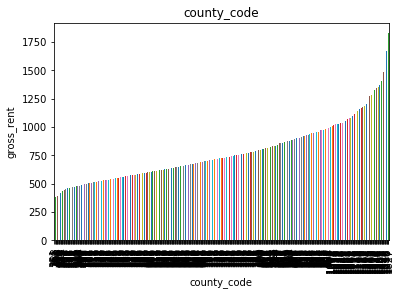

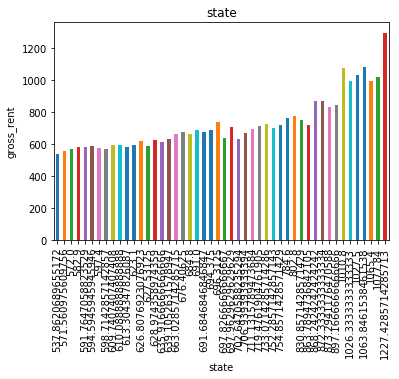

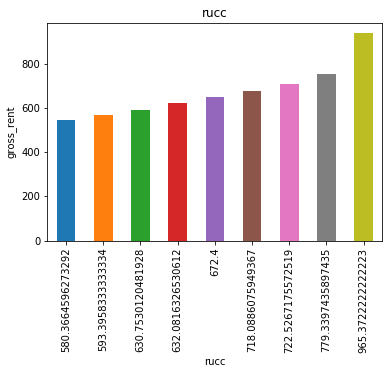

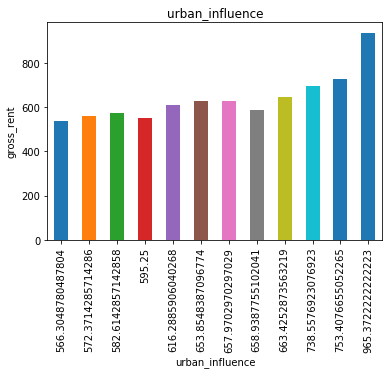

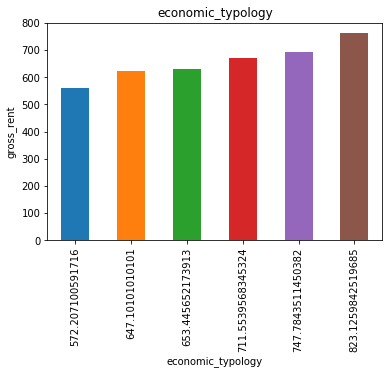

In [36]:
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['gross_rent'].median().plot.bar()
    plt.title(var)
    plt.ylabel('gross_rent')
    plt.savefig(var+'.jpg')
    plt.show()
    
for var in categorical:
    analyse_vars(X_train, var)

In [37]:
training_vars = [var for var in X_train.columns if var not in ['row_id', 'gross_rent']]
len(training_vars)

43

In [38]:
X_train[['row_id', 'gross_rent']].reset_index(drop=True)

,row_id,gross_rent
0,302,508
1,829,779
2,218,566
3,995,574
4,794,1009
5,1089,549
6,295,648
7,526,585
8,1029,607
9,557,769


In [39]:
# fit scaler
scaler = StandardScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set for later use

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[['row_id', 'gross_rent']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[training_vars]), columns=training_vars)],
                    axis=1)

X_test = pd.concat([X_test[['row_id', 'gross_rent']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[training_vars]), columns=training_vars)],
                    axis=1)

In [41]:
X_train.head()

,row_id,gross_rent,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,302,508,-0.999493,-1.062062,-0.339624,-0.296491,-0.121387,-4.090003e-01,0.070239,0.657858,-1.232645,-0.201485,-0.622666,-1.343813,2.253501,-0.952807,-0.108766,1.231605,-1.006589,-1.112944,-0.791464,-1.482772,1.552777,0.410975,-0.063861,0.465992,1.376118,1.028288,NaN,-2.444066,1.672646,0.996007,0.614875,0.949588,0.112103,-0.417474,0.527064,-0.216742,0.437397,1.373648,0.368432,-0.815731,-1.038570,-0.261133,0.887447
1,829,779,0.377218,-0.757604,1.725245,1.930060,1.347319,7.409502e-16,0.443672,-0.720793,1.471966,0.229130,-0.230596,0.949626,-0.533742,0.481634,0.482069,0.268344,0.603676,0.391194,0.093470,0.038939,-0.124240,0.291642,-0.577400,0.644463,-0.220165,0.249828,NaN,0.150776,0.368844,0.229463,-0.193592,0.343793,-1.033807,-1.384894,0.748152,0.268878,-0.904831,-0.501754,-0.943138,-0.011935,1.366817,1.021960,-0.413395
2,218,566,-0.704846,-0.878384,-0.451610,-0.626740,-1.099451,-1.202701e+00,-1.829657,0.736401,-1.049794,-1.197221,-0.785614,-0.216537,NaN,-0.868399,NaN,-1.322269,-0.901144,-1.064174,-1.819752,1.214742,-0.851190,-1.554711,-0.688344,-0.626161,-2.331761,-1.059040,NaN,0.036111,0.010340,-0.111005,0.709932,0.455617,1.039692,2.268437,0.228224,0.323694,0.817959,-1.058680,0.833992,1.052750,-0.552997,-0.225843,0.701707
3,995,574,-0.664205,-0.055179,-0.221184,-0.121469,0.815400,7.409502e-16,-0.113746,-0.262130,1.348441,-0.197630,-1.655584,-0.059630,NaN,0.492601,1.141905,1.134063,-0.588065,-0.711120,0.093470,-1.790075,1.443772,0.612432,0.280960,1.115928,-0.309807,1.719970,NaN,-0.130793,0.717849,0.768185,0.200884,1.103319,-0.116934,0.310921,-0.936221,0.073294,-0.392170,0.795624,0.934653,-1.158539,-0.596755,-0.333281,-0.229036
4,794,1009,1.545644,1.534422,1.023678,1.258406,1.585554,2.068058e+00,1.343167,-1.460043,1.653275,0.117459,0.020672,1.037800,-0.857938,0.852312,1.038197,0.213258,2.109213,2.095199,0.093470,0.177456,0.410081,-0.629886,-0.886430,1.206248,-0.237906,0.600226,NaN,0.082415,-0.007415,0.295402,-2.140201,0.359932,-0.781073,0.375092,0.857739,-0.099169,-0.790757,-0.526017,-0.908781,1.512098,0.522317,0.764829,-0.271374


In [42]:
X_test.isnull().mean()

row_id                                        0.000000
gross_rent                                    0.000000
county_code                                   1.000000
state                                         0.000000
population                                    0.000000
renter_occupied_households                    0.000000
pct_renter_occupied                           0.000000
evictions                                     0.000000
rent_burden                                   0.000000
pct_white                                     0.000000
pct_af_am                                     0.060703
pct_hispanic                                  0.003195
pct_am_ind                                    0.083067
pct_asian                                     0.086262
pct_nh_pi                                     0.552716
pct_multiple                                  0.006390
pct_other                                     0.364217
poverty_rate                                  0.000000
rucc      

In [43]:
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

In [ ]:
# FEATURE REMOVAL WAS DONE ON VISTUAL STUDIO CODE USING XBOOSTER